<a href="https://colab.research.google.com/github/Trivendar-Reddy-Nukala/AI-project/blob/main/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.dropna(inplace=True)

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [12]:
df['duration_val'] = df['duration'].str.split(' ').str[0].astype('int')

In [17]:
df['duration_min'] = np.where(df['duration'].str.contains('min'), df['duration_val'], np.nan)
df['duration_season'] = np.where(df['duration'].str.contains('Seasons'), df['duration_val'], np.nan)

In [19]:
df.drop('duration', axis=1, inplace=True)
df.drop('duration_val', axis=1, inplace=True)

In [22]:
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()


In [23]:
df['country_list'] = df['country'].str.split(',')
df['genre_list'] = df['listed_in'].str.split(',')


In [24]:
df['country_list'] = df['country_list'].apply(
    lambda x: [i.strip() for i in x] if isinstance(x, list) else x
)

df['genre_list'] = df['genre_list'].apply(
    lambda x: [i.strip() for i in x] if isinstance(x, list) else x
)


In [32]:
type(df.loc[7, 'country_list'])


list

In [37]:
df_country = df.explode('country_list')
df_genre = df.explode('genre_list')


In [38]:
df_country = df_country.reset_index(drop=True)
df_genre = df_genre.reset_index(drop=True)


In [39]:
country_counts = df_country['country_list'].value_counts()
country_counts.head(10)


,count
country_list,
United States,2485
India,940
United Kingdom,485
Canada,295
France,293
Germany,167
Spain,161
Japan,124
China,109


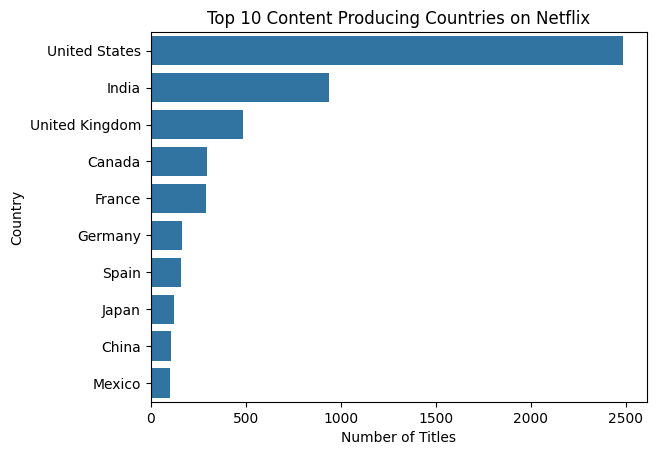

In [40]:
top_countries = country_counts.head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)

plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [42]:
df_country_genre = (
    df
    .explode('country_list')
    .explode('genre_list')
    .reset_index(drop=True)
)


In [43]:
df_country_genre = df_country_genre.dropna(
    subset=['country_list', 'genre_list']
)


In [44]:
top_countries = df_country_genre['country_list'].value_counts().head(10).index
top_genres = df_country_genre['genre_list'].value_counts().head(10).index

df_filtered = df_country_genre[
    (df_country_genre['country_list'].isin(top_countries)) &
    (df_country_genre['genre_list'].isin(top_genres))
]


In [45]:
pivot = pd.pivot_table(
    df_filtered,
    index='country_list',
    columns='genre_list',
    values='title',
    aggfunc='count',
    fill_value=0
)


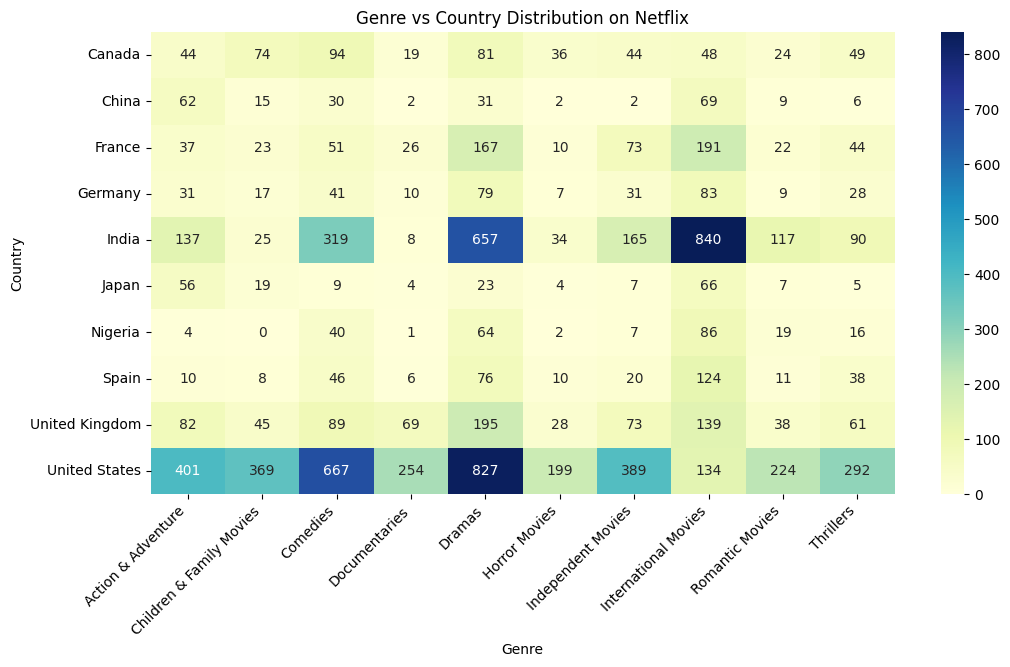

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Genre vs Country Distribution on Netflix')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()


In [53]:
top_tv_countries = df_tv['country_list'].value_counts().head(10).index
top_tv_genres = df_tv['genre_list'].value_counts().head(10).index


In [54]:
tv_pivot = pd.pivot_table(
    df_tv[
        df_tv['country_list'].isin(top_tv_countries) &
        df_tv['genre_list'].isin(top_tv_genres)
    ],
    index='country_list',
    columns='genre_list',
    values='title',
    aggfunc='count',
    fill_value=0
)


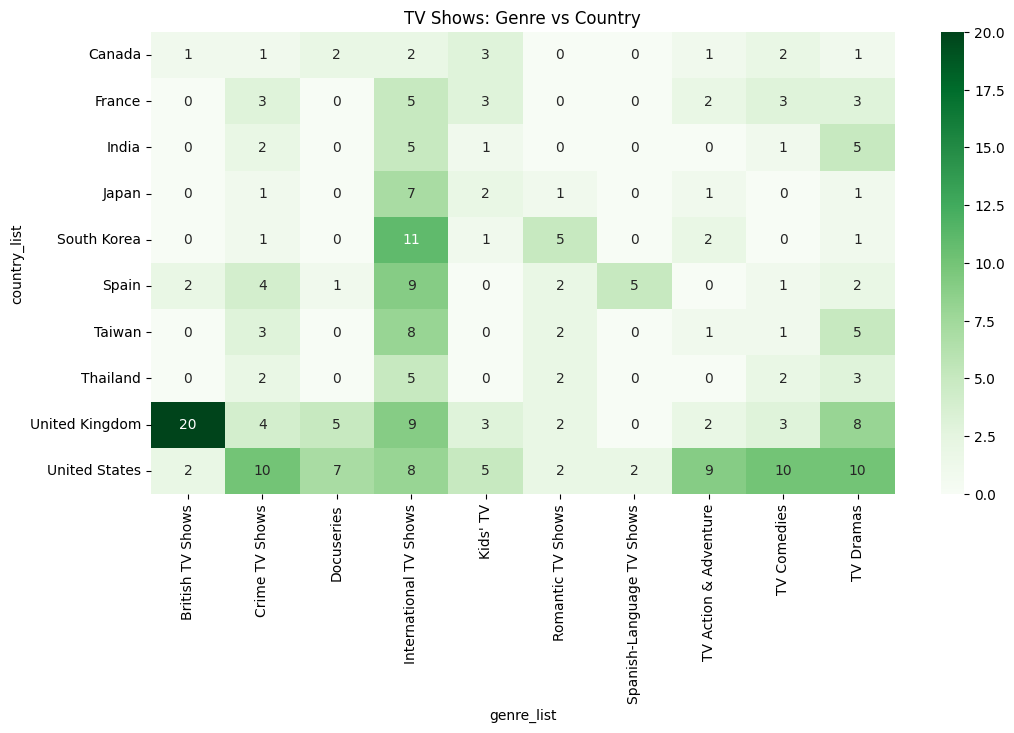

In [55]:
plt.figure(figsize=(12, 6))
sns.heatmap(tv_pivot, annot=True, fmt='d', cmap='Greens')
plt.title('TV Shows: Genre vs Country')
plt.show()


In [57]:
movie_pct = movie_pivot.div(movie_pivot.sum(axis=1), axis=0) * 100
tv_pct = tv_pivot.div(tv_pivot.sum(axis=1), axis=0) * 100


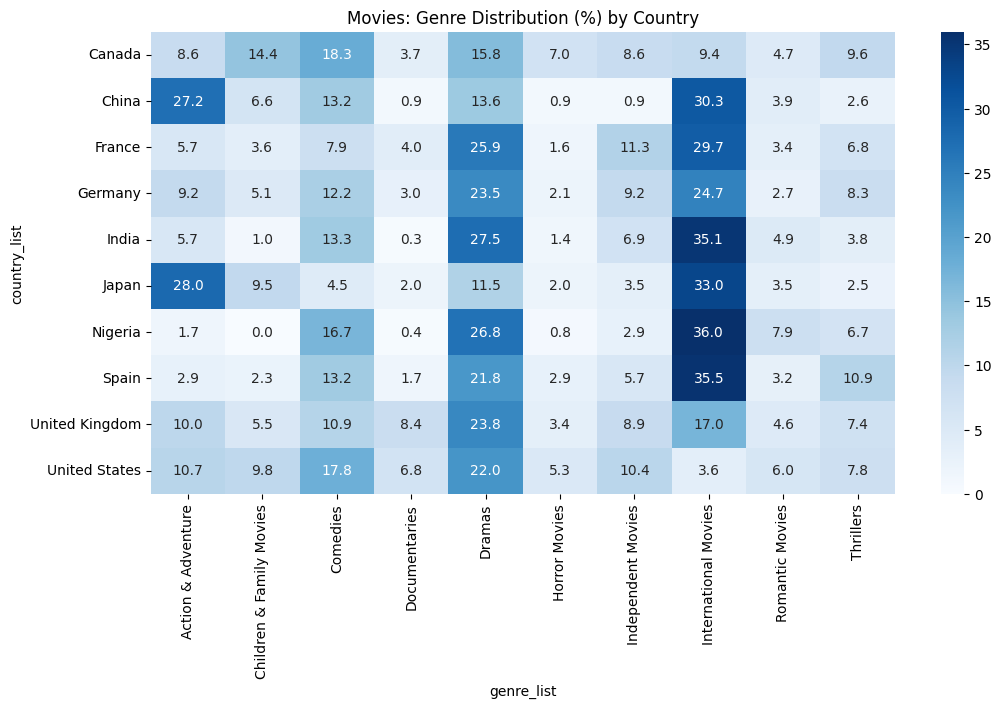

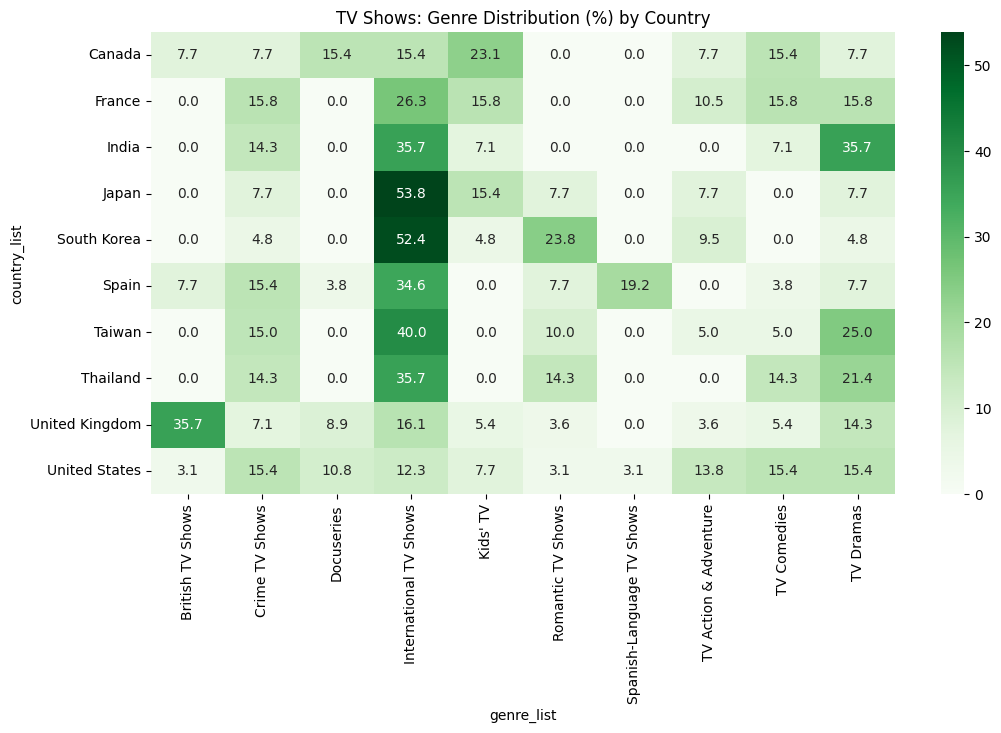

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(movie_pct, annot=True, fmt='.1f', cmap='Blues')
plt.title('Movies: Genre Distribution (%) by Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(tv_pct, annot=True, fmt='.1f', cmap='Greens')
plt.title('TV Shows: Genre Distribution (%) by Country')
plt.show()


In [59]:
country = 'India'


In [60]:
year_genre = (
    df_cg[df_cg['country_list'] == country]
    .groupby(['release_year', 'genre_list'])
    .size()
    .reset_index(name='count')
)


In [61]:
top_genres_country = (
    year_genre.groupby('genre_list')['count']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

year_genre = year_genre[
    year_genre['genre_list'].isin(top_genres_country)
]


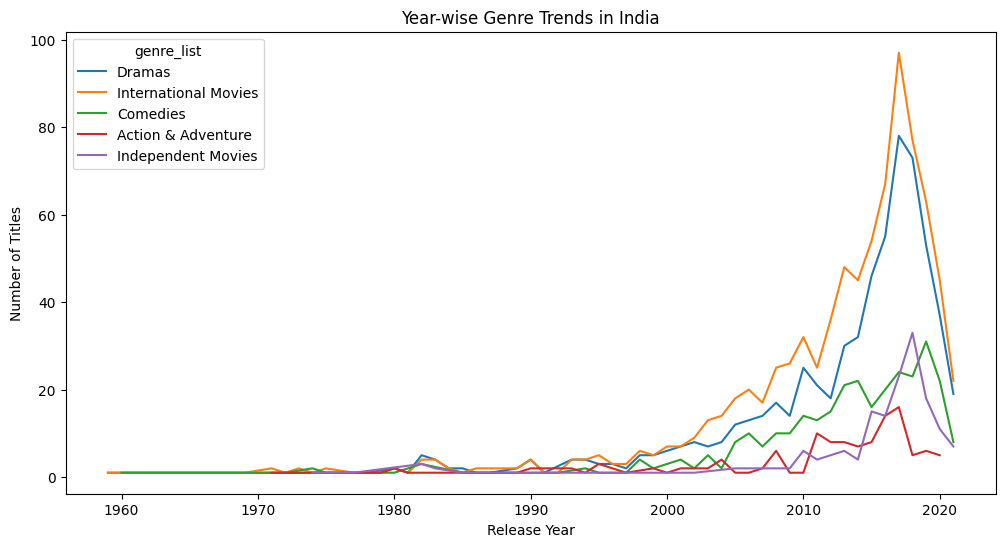

In [62]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=year_genre,
    x='release_year',
    y='count',
    hue='genre_list'
)

plt.title(f'Year-wise Genre Trends in {country}')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()
